# Laboratorio Detección de Contornos

    Inés Heras Cáceres
    Joaquín Delgado Fernández
    Manuel Pasieka
    Sol Román Mendaña

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian, laplace, rank,median,hessian
from skimage.segmentation import active_contour, felzenszwalb, mark_boundaries
import matplotlib.patches as mpatches
import skimage.io as io
from skimage import exposure
from skimage import morphology
from skimage.morphology import erosion, dilation, opening, closing, white_tophat,black_tophat
from skimage.util import img_as_ubyte
from skimage import exposure
from skimage.draw import polygon_perimeter
from skimage.morphology import skeletonize, skeletonize_3d
from skimage.morphology import disk
from skimage.transform import rotate
from skimage.filters import threshold_otsu



http://scikit-image.org/docs/dev/auto_examples/segmentation/plot_morphsnakes.html

## Imagen Mariposa

Dimensiones = (183, 274)


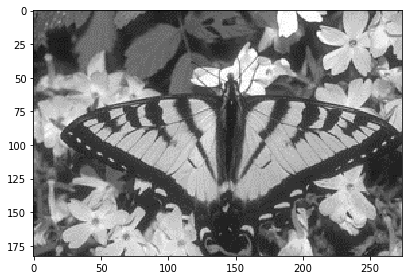

In [2]:
#Se lee la imagen
img =io.imread("tema10_act1a.png")
img = rgb2gray(img)
print("Dimensiones = "+ str(img.shape))
io.imshow(img)
io.show()


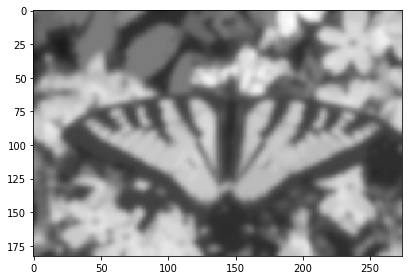

In [3]:
#Filtro gaussiano con forma de diamante, la más similar a la mariposa
diamond = morphology.diamond(2)
opened = opening(img, diamond)
exp = exposure.adjust_log(opened)
gaus = gaussian(exp,2)
io.imshow(gaus,cmap=plt.cm.gray)
io.show()

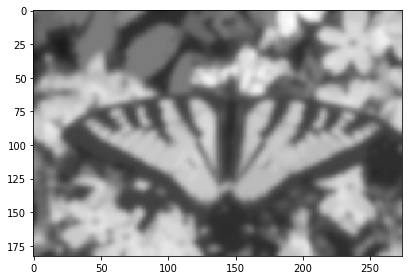

In [4]:
io.imshow(gaus,cmap=plt.cm.gray)
io.show()

In [5]:

#s = np.linspace(0, 2*np.pi, 400)

#x = (img.shape[1]/2)+10 + 130*np.cos(s)
#y = (img.shape[0]/2)+10 + 60*np.sin(s)

#init = np.array([x, y]).T
r = np.array([10, 150, 270, 140])
c = np.array([90, 50, 90, 165])
rr, cc = polygon_perimeter(r, c)
p = np.column_stack((rr, cc))

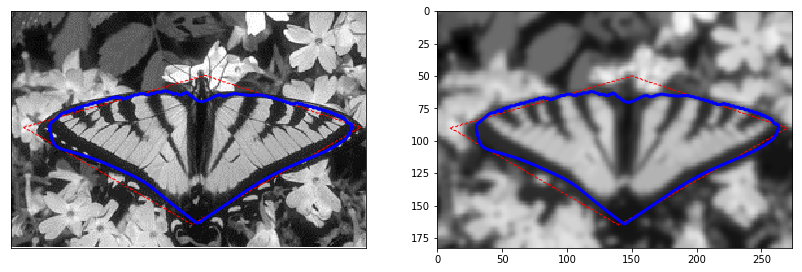

In [6]:
#Se crea un polígono con forma de diamante para inicializar el contorno
#La elección de la forma inicial 
r = np.array([10, 150, 270, 140])
c = np.array([90, 50, 90, 165])
rr, cc = polygon_perimeter(r, c)
p = np.column_stack((rr, cc))

#Se aplica la detección de contorno activo sobre la imagen filtrada. 
#Con el parámetro w_line, indicamos que nos aproximaremos a las zonas oscuras
snake = active_contour(gaus,p, alpha=0.01, beta=50, gamma=0.001, w_line=-2)


fig, (ax,ax2) = plt.subplots(figsize=(14, 14),ncols=2)
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(p[:, 0], p[:, 1], '--r', lw=1)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3)

ax2.imshow(gaus, cmap=plt.cm.gray)
ax2.plot(p[:, 0], p[:, 1], '--r', lw=1)
ax2.plot(snake[:, 0], snake[:, 1], '-b', lw=3)

ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])
plt.show()

## Imagen Buho

In [7]:
from skimage.filters.rank import entropy
#Se lee la imagen
img_owl =io.imread("tema10_act1b.png")
img_owl = rgb2gray(img_owl)
print("Dimensiones = "+ str(img.shape))
#io.imshow(img)
#io.show()

Dimensiones = (183, 274)


Utilizaremos la entropía para tratar de diferenciar el buho y el fondo. Los filtros no parecen adecuados ya que el tipo de distorsiones con las mismas entre la figura que queremos detectar y el entorno

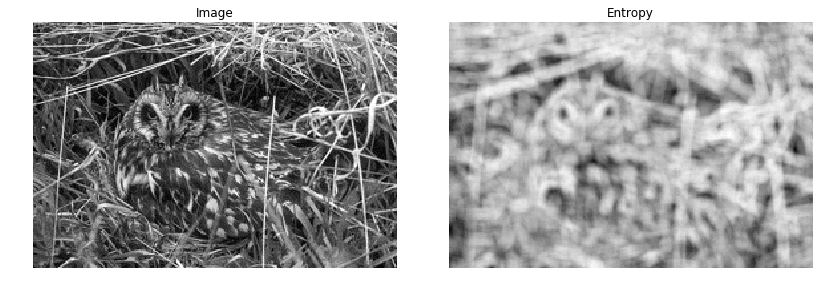

In [8]:
image_owl = img_as_ubyte(img_owl)
img_owl_entropy=entropy(image_owl,disk(5))

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 4),
                               sharex=True, sharey=True)

img0 = ax0.imshow(image_owl, cmap=plt.cm.gray)
ax0.set_title("Image")
ax0.axis("off")

img1 = ax1.imshow(img_owl_entropy, cmap='gray')
ax1.set_title("Entropy")
ax1.axis("off")

fig.tight_layout()

plt.show()

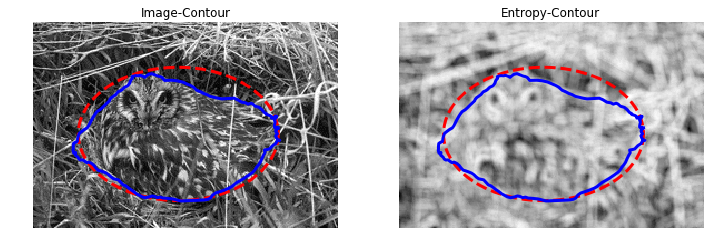

In [9]:
#Inicializamos como contorno una elipse
s = np.linspace(0, 2*np.pi, 200)
x = 130 + 90*np.cos(s)
y = 100 + 60*np.sin(s)
init = np.array([x, y]).T

#Con el parámetro w_edge, le indicamos que se aproxime más a los bordes blancos, que son los que nos ha dado la entropía
snake = active_contour(img_owl_entropy,
                       init, alpha=0.010, beta=100, w_line=10, w_edge=10)


fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 4),
                               sharex=True, sharey=True)

ax0.imshow(img_owl, cmap=plt.cm.gray)
ax0.plot(init[:, 0], init[:, 1], '--r', lw=3)
ax0.plot(snake[:, 0], snake[:, 1], '-b', lw=3)
#ax0.axis([0, img_owl.shape[1], img_owl.shape[0], 0])
ax0.axis("off")
ax0.set_title("Image-Contour")

ax1.imshow(img_owl_entropy, cmap=plt.cm.gray)
ax1.plot(init[:, 0], init[:, 1], '--r', lw=3)
ax1.plot(snake[:, 0], snake[:, 1], '-b', lw=3)
#ax1.axis([0, img_owl_entropy.shape[1], img_owl_entropy.shape[0], 0])
ax1.axis("off")
ax1.set_title("Entropy-Contour")
plt.show()


In [10]:
#Se detecta el contorno de casi todo el contorno del buho, por lo que lo consideramos bastante satisfactorio

## Imagen Caballos

Dimensiones = (185, 274)


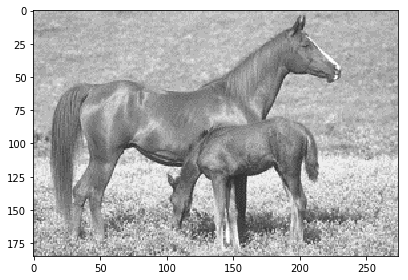

In [11]:

img_horse =io.imread("tema10_act1c.png")
img_horse = rgb2gray(img_horse)
print("Dimensiones = "+ str(img_horse.shape))

io.imshow(img_horse)
io.show()

### Para la detección de contornos en la imagen de los caballos hemos utilizado un primer método combinando varias técnicas

C:\Users\Inés\Anaconda3\lib\site-packages\skimage\util\arraycrop.py:177: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = ar[slices]


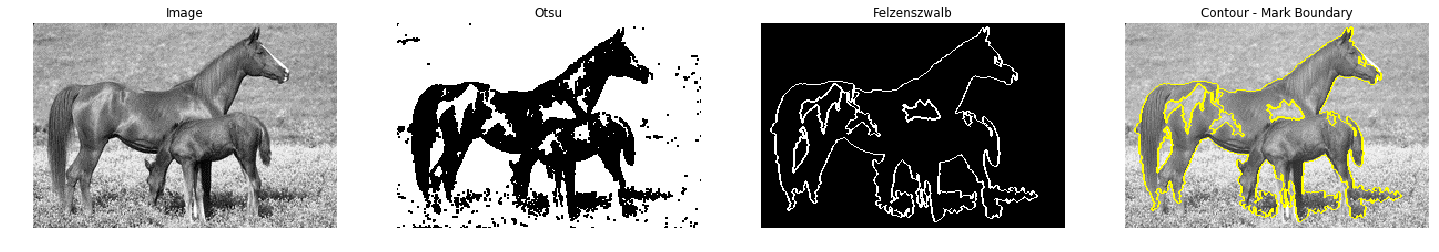

In [12]:
#Utilizamos el método Otsu, un método de valor umbral que intenta que la dispersión dentro de cada segmento 
#sea lo más pequeña posible, y lo más alta posible entre segmentos diferentes
thresh = threshold_otsu(exposure.adjust_gamma(img_horse))
#Con el cierre tratamos de minimizar los huecos encontrados dentro de los caballos, por efecto de los brillos
bw = closing(img_horse > thresh, morphology.square(2))

#Empleamos la segmentación de felzenszwalb, basada en clustering
segments_fz = felzenszwalb(bw, scale=220, sigma=0.1, min_size=220)
fz_image = rgb2gray(mark_boundaries(np.zeros((185, 274)), segments_fz))


fig, (ax0,ax1,ax2,ax3) = plt.subplots(figsize=(25, 25),ncols=4)


ax0.imshow(img_horse,cmap=plt.cm.gray)
ax0.set_title("Image")
ax0.axis("off")
ax1.imshow(bw,cmap=plt.cm.gray)
ax1.set_title("Otsu")
ax1.axis("off")
ax2.imshow(fz_image,cmap=plt.cm.gray)
ax2.set_title("Felzenszwalb")
ax2.axis("off")

ax3.imshow(mark_boundaries(img_horse, segments_fz), cmap=plt.cm.gray)
ax3.set_title("Contour - Mark Boundary")
ax3.axis("off")

plt.show()

### También hemos empleado el cálculo del gradiente de la imagen para la detección de contornos

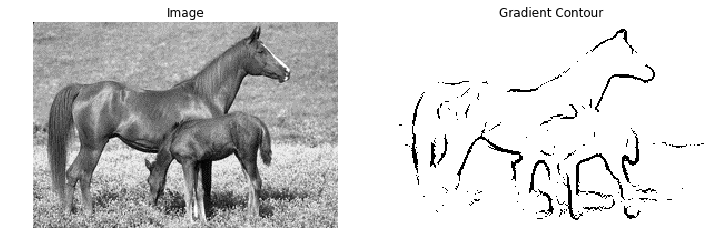

In [13]:
#En primer lugar suavizamos la imagen
denoised = rank.median(img_horse, disk(5))

#Calculo del gradiente de la imagen. Se han probado distintos valores como pico de cresta
markers = rank.gradient(denoised, disk(1))  <18


fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 4),
                               sharex=True, sharey=True)

ax0.imshow(img_horse,cmap=plt.cm.gray)
#ax0.axis([0, img_owl.shape[1], img_owl.shape[0], 0])
ax0.axis("off")
ax0.set_title("Image")

ax1.imshow(markers,cmap=plt.cm.gray)
#ax1.axis([0, img_owl_entropy.shape[1], img_owl_entropy.shape[0], 0])
ax1.axis("off")
ax1.set_title("Gradient Contour")
plt.show()